In [0]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [49]:
dataset=pd.read_csv('teleCust1000t.csv')
dataset.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [50]:
dataset['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [0]:
x=dataset.drop('custcat',axis=1)
y=dataset['custcat']

In [52]:
X=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [0]:
Y=y.values

In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print('train data size is',x_train.shape)
print('test data size is',x_test.shape)

train data size is (800, 11)
test data size is (200, 11)


In [55]:
print('y',y_train.shape)

y (800,)


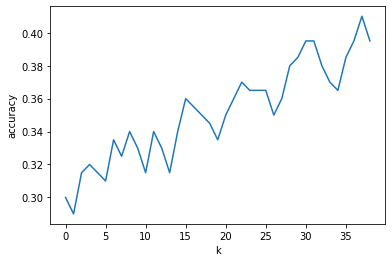

The maximum accuracy is 0.41 and k value for max accuracy is 38


In [58]:
#finding best k for the dataset
max_k=40
acc=[]
for i in range(1,max_k):
  model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
  y_pred_test=model.predict(x_test)
  accuracy=accuracy_score(y_pred_test,y_test)
  acc.append(accuracy)

plt.plot(acc)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()
print('The maximum accuracy is',max(acc),'and k value for max accuracy is',acc.index(max(acc))+1)

In [59]:
#model with best k
k_selected=38
model=KNeighborsClassifier(k_selected).fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
accuracy=accuracy_score(y_train,y_pred_train)
accuracy1=accuracy_score(y_test,y_pred_test)
print('accuracy for train dataset is',accuracy,'and accuracy for test dataset is',accuracy1)

accuracy for train dataset is 0.4275 and accuracy for test dataset is 0.41
